In [18]:
# We will use this package for our graph 
!pip install lightning-python

In [19]:
from lightning import Lightning

In [20]:
import json
from operator import itemgetter

playtimes = []

def get_data( index ) :
    
    with open('data{}_{}.json'.format( index*50, index*50+50 )) as data_file:    
        data = json.load( data_file )

    for player in data:
        for server in player:

            if( server in ['eu', 'us', 'kr'] and player[server] and player[server]['heroes']['playtime']['competitive'] ):

                playtimes.append( sorted( player[server]['heroes']['playtime']['competitive'].items(), key=lambda v:v[1], reverse=True )[:3] )
            
for i in range(10):
    get_data( i )
    
print( len(playtimes) )

936


In [81]:
hero_dict = {
        'genji' : 0,
        'tracer' : 1,
        'reaper' : 2,
        'sombra' : 3,
        'mccree' : 4,
        'pharah' : 5,
        'soldier76' : 6,
        
        'hanzo' : 7,
        'junkrat' : 8,
        'mei' : 9,
        'widowmaker' : 10,
        'bastion' : 11,
        'torbjorn' : 12,
        
        'dva' : 13,
        'reinhardt' : 14,
        'orisa' : 15,
        'roadhog' : 16,
        'winston' : 17,
        'zarya' : 18,
        
        'lucio' : 19,
        'mercy' : 20,
        'zenyatta' : 21,
        'symmetra' : 22,
        'ana' : 23
}

graph = {
    'nodes': list( range( len(hero_dict) ) ),
    'group': [],
    'labels': list( hero_dict )
}

graph['group'] += [1]*7
graph['group'] += [2]*6
graph['group'] += [3]*6
graph['group'] += [4]*5

print( hero_dict )
print( graph )

{'genji': 0, 'tracer': 1, 'reaper': 2, 'sombra': 3, 'mccree': 4, 'pharah': 5, 'soldier76': 6, 'hanzo': 7, 'junkrat': 8, 'mei': 9, 'widowmaker': 10, 'bastion': 11, 'torbjorn': 12, 'dva': 13, 'reinhardt': 14, 'orisa': 15, 'roadhog': 16, 'winston': 17, 'zarya': 18, 'lucio': 19, 'mercy': 20, 'zenyatta': 21, 'symmetra': 22, 'ana': 23}
{'nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'group': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], 'labels': ['genji', 'tracer', 'reaper', 'sombra', 'mccree', 'pharah', 'soldier76', 'hanzo', 'junkrat', 'mei', 'widowmaker', 'bastion', 'torbjorn', 'dva', 'reinhardt', 'orisa', 'roadhog', 'winston', 'zarya', 'lucio', 'mercy', 'zenyatta', 'symmetra', 'ana']}


In [132]:
from collections import Counter

connections = []
graph['conn'] = []

# for i in range( len(hero_dict) ):
#     graph['conn'].append( [0]*(len(hero_dict)-1) )

def connect ( source, target ):
    if source > target:
        return ( hero_dict[source], hero_dict[target] )
    else:
        return ( hero_dict[target], hero_dict[source] )

for times in playtimes:
    connections.append( connect( times[0][0], times[1][0] ) )
    connections.append( connect( times[1][0], times[2][0] ) )
    connections.append( connect( times[2][0], times[0][0] ) )

connections = dict( Counter(connections) )

# print( connections )
# print( graph )

for (s, t) in connections:
    if connections[(s,t)] > 20:
        graph['conn'].append( ( s , t, connections[(s,t)]/10 ) )

print( graph['conn'] )

[(1, 6, 23.6), (6, 16, 7.7), (1, 16, 5.5), (0, 23, 3.6), (21, 23, 4.7), (20, 23, 2.2), (6, 0, 18.0), (1, 0, 14.4), (4, 0, 7.3), (1, 4, 10.1), (6, 4, 11.5), (18, 16, 5.4), (18, 6, 8.6), (6, 23, 6.6), (4, 23, 3.2), (18, 4, 3.9), (18, 17, 3.6), (16, 0, 5.2), (18, 23, 4.3), (18, 0, 6.5), (18, 14, 2.6), (16, 23, 3.7), (1, 23, 4.1), (18, 1, 8.7), (17, 16, 2.1), (5, 0, 2.1), (18, 13, 2.8), (18, 5, 2.4), (17, 14, 6.3), (16, 14, 3.2), (16, 13, 2.2), (20, 19, 2.2), (14, 23, 4.6), (19, 23, 6.6), (21, 19, 2.2), (14, 19, 3.4)]


In [86]:
lgn = Lightning( local=True )

Lightning initialized


In [87]:
import os
from lightning import Lightning

from numpy import random, asarray, linspace, corrcoef
from colorsys import hsv_to_rgb
from sklearn import datasets
import networkx as nx


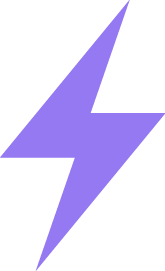

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [104]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [133]:


lgn.force( conn=graph['conn'], group=graph['group'], labels=graph['labels'])